This dataset examines all aspects of the developer experience from career satisfaction and job search to education and opinions on open data source software.

You can get more information on it here: https://insights.stackoverflow.com/survey

## A Look at the data

### Importing lobraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ALookAtTheData as t
from IPython import display
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv(r"C:\Users\sousa\Desktop\github\SODeveloperSurvey\Data\survey-results-public.csv", encoding = 'utf-8')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## EDA

In [2]:
#checking rows and columns
n_rows = df.shape[0]
n_cols = df.shape[1]

t.check_rows_cols(n_rows, n_cols) 

Nice job there are 51392 rows in the dataset!
Nice job there are 154 columns in the dataset!


In [3]:
#info on the t.check_rows_cols function
t.check_rows_cols?

In [4]:
#cheking for missing values, get set of column names with no missing values
no_nulls = set(df.columns[~df.isnull().any()])
print(no_nulls)
display.HTML(t.no_null_cols(no_nulls))

{'FormalEducation', 'EmploymentStatus', 'Professional', 'Respondent', 'Country', 'ProgramHobby', 'University'}
Nice job that looks right!


In [5]:
#cheking wich columns have the most missing values, getting a set of column names with more than 75% of the data missing
most_missing_cols = set(df.columns[df.isnull().mean() > 0.75])

t.most_missing_cols(most_missing_cols)

Nice job that looks right!


Text(0.5, 1.0, 'Professional Statuses Counts')

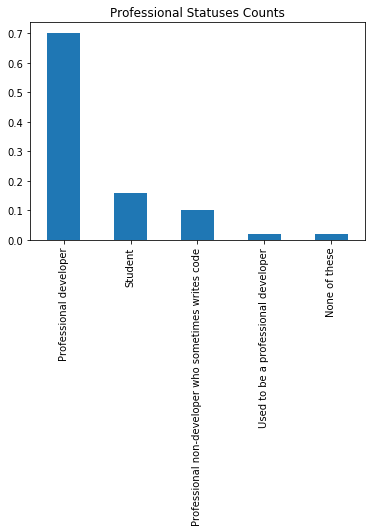

In [6]:
#getting a series of the different professional statuses in the dataset.

#getting total counts for each status
status_vals = df.Professional.value_counts()

#create bar chart for the counts
(status_vals/df.shape[0]).plot(kind = 'bar')
plt.title('Professional Statuses Counts')

Text(0.5, 1.0, 'Formal Education Status')

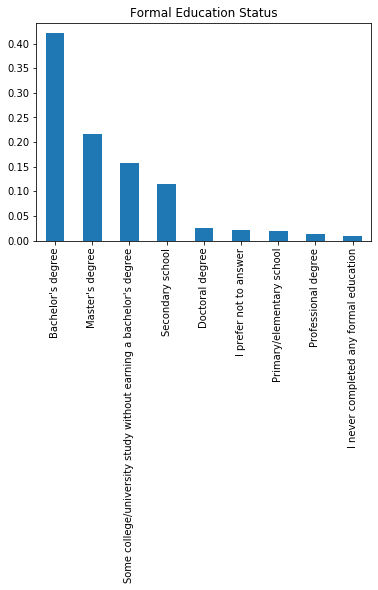

In [7]:
#check different Formal education statuses in a series 
#getting the counts
ed_statuses = df.FormalEducation.value_counts()

#plotting
(ed_statuses/df.shape[0]).plot(kind="bar")
plt.title("Formal Education Status")

Text(0.5, 1.0, 'Country')

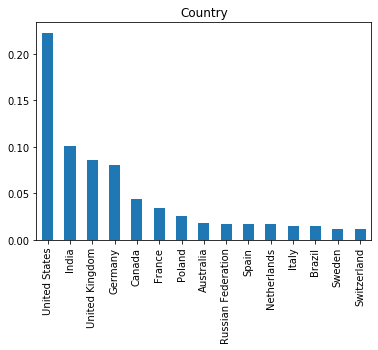

In [8]:
#exploring the different countries of the participants
count_vals = df.Country.value_counts()

#Since there are too many focusing on the top 15
(count_vals[:15]/df.shape[0]).plot(kind="bar")
plt.title("Country")

In [9]:
#loading the second dataset
df2 = pd.read_csv(r"C:\Users\sousa\Desktop\github\SODeveloperSurvey\Data\survey-results-schema.csv")
df2.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [10]:
#get descriptions for each column
def get_description(column_name, df = df2):
    '''
    INPUT
    df - df I want to get the column descriptions for
    column_name - column I want the description for
    
    OUTPUT
    desc - the description for the column
    '''
    desc = list(df[df['Column'] == column_name]['Question'])[0]
    return desc

In [11]:
get_description(df.columns[1])

'Which of the following best describes you?'

In [12]:
#Career switches.How to get into the field? check CousinEducation
list(df2[df2.Column == 'CousinEducation']['Question'])

["Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which

In [13]:
#check the avice given to the participants
study = df['CousinEducation'].value_counts().reset_index()
study.head()

,index,CousinEducation
0,Take online courses; Buy books and work throug...,711
1,Take online courses,551
2,None of these,523
3,Take online courses; Part-time/evening courses...,479
4,Take online courses; Bootcamp; Part-time/eveni...,465


In [14]:
#based on this information I will change the column names to something more significant
study.rename(columns = {'index' : 'method', 'CousinEducation' : 'count'}, inplace = True)
study.head()

,method,count
0,Take online courses; Buy books and work throug...,711
1,Take online courses,551
2,None of these,523
3,Take online courses; Part-time/evening courses...,479
4,Take online courses; Bootcamp; Part-time/eveni...,465


In [15]:
study.method.unique()

array(['Take online courses; Buy books and work through the exercises',
       'Take online courses', 'None of these',
       'Take online courses; Part-time/evening courses; Buy books and work through the exercises',
       'Take online courses; Bootcamp; Part-time/evening courses; Buy books and work through the exercises',
       'Other',
       'Return to college; Take online courses; Part-time/evening courses; Buy books and work through the exercises',
       'Take online courses; Contribute to open source; Buy books and work through the exercises; Conferences/meet-ups',
       'Take online courses; Contribute to open source; Buy books and work through the exercises',
       'Take online courses; Contribute to open source; Part-time/evening courses; Buy books and work through the exercises',
       'Take online courses; Part-time/evening courses; Buy books and work through the exercises; Conferences/meet-ups',
       'Buy books and work through the exercises',
       'Take online c

In [16]:
#creating a list of the individual methods suggested
values_in_method = ['Take online courses', 'Buy books and work through the exercises','None of these', 
                    'Get a job as a QA tester', 'Return to college', 'Participate in online coding competitions',
                   'Part-time/evening courses', 'Contribute to open source', 'Bootcamp', 'Conferences/meet-ups',
                   'Other', 'Participate in hackathons', 'Master\'s degree' ]

In [17]:
def clean_and_plot(df, title = 'Education Method counts', plot = True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    study = df['CousinEducation'].value_counts().reset_index()
    study.rename(columns={'index': 'method', 'CousinEducation': 'count'}, inplace=True)
    study_df = t.total_count(study, 'method', 'count', values_in_method)

    study_df.set_index('method', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df

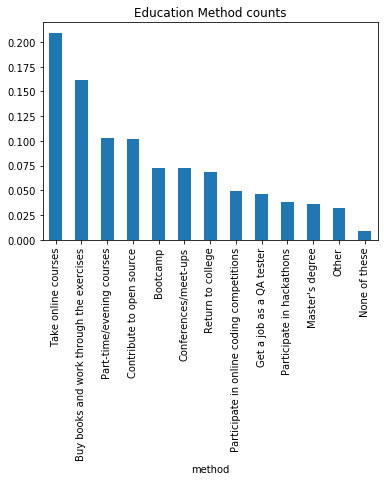

In [18]:
props_df = clean_and_plot(df)

In [19]:
#check for the existence of bias towards their own degrees
def higher_ed(formal_ed_str):
    '''
    INPUT
        formal_ed_str - a string of one of the values from the Formal Education column
    
    OUTPUT
        return 1 if the string is  in ("Master's degree", "Doctoral", "Professional degree")
        return 0 otherwise
    
    '''
    if formal_ed_str in ("Master's degree", "Doctoral", "Professional degree"):
        return 1
    else:
        return 0

In [20]:
df["FormalEducation"].apply(higher_ed)[:5] #Test your function to assure it provides 1 and 0 values for the df

0    0
1    0
2    0
3    0
4    1
Name: FormalEducation, dtype: int64

In [21]:
df['HigherEd'] = df["FormalEducation"].apply(higher_ed)
higher_ed_perc = df['HigherEd'].mean()
t.higher_ed_test(higher_ed_perc)

Nice job!  That's right.  The percentage of individuals in these three groups is 0.23069738480697385.


In [22]:
#check proportion of people that completed Higher ed and their responses
ed_1 = df[df['HigherEd'] == 1] # Subset df to only those with HigherEd of 1
ed_0 = df[df['HigherEd'] == 0] # Subset df to only those with HigherEd of 0


print(ed_1['HigherEd'][:5]) #Assure it looks like what you would expect
print(ed_0['HigherEd'][:5]) #Assure it looks like what you would expect

4     1
6     1
7     1
9     1
14    1
Name: HigherEd, dtype: int64
0    0
1    0
2    0
3    0
5    0
Name: HigherEd, dtype: int64


In [23]:
#Check your subset is correct - you should get a plot that was created using pandas styling
#which you can learn more about here: https://pandas.pydata.org/pandas-docs/stable/style.html

ed_1_perc = clean_and_plot(ed_1, 'Higher Formal Education', plot=False)
ed_0_perc = clean_and_plot(ed_0, 'Max of Bachelors Higher Ed', plot=False)

comp_df = pd.merge(ed_1_perc, ed_0_perc, left_index=True, right_index=True)
comp_df.columns = ['ed_1_perc', 'ed_0_perc']
comp_df['Diff_HigherEd_Vals'] = comp_df['ed_1_perc'] - comp_df['ed_0_perc']
comp_df.style.bar(subset=['Diff_HigherEd_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])

,ed_1_perc,ed_0_perc,Diff_HigherEd_Vals
method,,,
Take online courses,0.207892,0.2099,-0.00200857
Buy books and work through the exercises,0.162073,0.161205,0.00086766
Part-time/evening courses,0.103298,0.103248,4.98833e-05
Contribute to open source,0.097821,0.10323,-0.00540923
Bootcamp,0.0746172,0.071824,0.0027932
Return to college,0.0687279,0.0689754,-0.000247487
Conferences/meet-ups,0.0658422,0.0739201,-0.00807796
Master's degree,0.0589517,0.0293459,0.0296058
Get a job as a QA tester,0.0484688,0.0457388,0.00273003


In [24]:
#Checking how often each of these individual values appear with the help of a function
def occurence_counts(df, col1, col2, occurence):
    '''
    INPUT: 
    df - pandas df I want to do the search in
    col1 - column I want to look through
    col2 - column I want to count values from
    occurence - list of strings to search for in the df rows
    
    output - novel df with the individual occurence counts
    '''
    from collections import defaultdict
    new_df = defaultdict(int)
    for val in occurence:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending = False, inplace = True)
    
    return new_df

In [25]:
study_df = occurence_counts(study, 'method', 'count', values_in_method)
study_df

,method,count
0,Take online courses,15246
1,Buy books and work through the exercises,11750
6,Part-time/evening courses,7517
7,Contribute to open source,7423
8,Bootcamp,5276
9,Conferences/meet-ups,5244
4,Return to college,5017
5,Participate in online coding competitions,3610
3,Get a job as a QA tester,3376
11,Participate in hackathons,2747


In [26]:
#create a new column with the percentages for each of the methods
study_df['%'] = study_df['count']/np.sum(study_df['count'])*100
study_df

,method,count,%
0,Take online courses,15246,20.943171
1,Buy books and work through the exercises,11750,16.140775
6,Part-time/evening courses,7517,10.325975
7,Contribute to open source,7423,10.196849
8,Bootcamp,5276,7.247551
9,Conferences/meet-ups,5244,7.203594
4,Return to college,5017,6.891768
5,Participate in online coding competitions,3610,4.958996
3,Get a job as a QA tester,3376,4.637554
11,Participate in hackathons,2747,3.773507


In [27]:
#What if we take into account the input of those that are the highest earners? Or the greatest job satisfaction?
def relevant_method(df, col_name, col_mean, occurences):
    '''
    INPUT:
    df - df I want to do the search in
    col_name - col name I want to look through
    col_count - col I want to count values from
    col_mean - col I want the mean from
    occurences - list of strings I want to search for in each row of df[col]
    
    OUTPUT:
    df_all - holds sum, square, total, mean, variations and standard dev
    '''
    from collections import defaultdict
    new_df = defaultdict(int)
    squares_df = defaultdict(int)
    denoms = dict()
    for val in occurences:
        denoms[val] = 0
        for idx in range(df.shape[0]):
            if df[col_name][idx] and df[col_mean][idx] > 0:
                new_df[val] += df[col_mean][idx]
                squares_df[val] += df[col_mean][idx]**2
                denoms[val] += 1
                
    #turn into dataframe
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    squares_df = pd.DataFrame(pd.Series(squares_df)).reset_index()
    denoms = pd.DataFrame(pd.Series(denoms)).reset_index()
    
    #change the column names
    new_df.columns = [col_name, 'col_sum']
    squares_df.columns = [col_name, 'col_squares']
    denoms.columns = [col_name, 'col_total']
    
    #merge the 2 dataframes
    df_means = pd.merge(new_df, denoms)
    df_all = pd.merge(df_means, squares_df)
    
    #additional columns to help with the analysis
    df_all['mean_col'] = df_means['col_sum']/df_means['col_total']
    df_all['var_col'] = df_all['col_squares']/df_all['col_total'] - df_all['mean_col']**2
    df_all['std_col'] = np.sqrt(df_all['var_col'])
    df_all['lower_95'] = df_all['mean_col'] - 1.96*df_all['std_col']/np.sqrt(df_all['col_total'])
    df_all['upper_95'] = df_all['mean_col'] + 1.96*df_all['std_col']/np.sqrt(df_all['col_total'])
    
    return df_all
    

In [28]:
df_all = relevant_method(df, 'CousinEducation', 'Salary', values_in_method)

In [29]:
#now lets sort the results based on the mean
df_all.sort_values('mean_col', ascending = False)

,CousinEducation,col_sum,col_total,col_squares,mean_col,var_col,std_col,lower_95,upper_95
0,Take online courses,7.257437e+08,12885,6.135964e+13,56324.696464,1.589627e+09,39870.129079,55636.263747,57013.129181
1,Buy books and work through the exercises,7.257437e+08,12885,6.135964e+13,56324.696464,1.589627e+09,39870.129079,55636.263747,57013.129181
2,None of these,7.257437e+08,12885,6.135964e+13,56324.696464,1.589627e+09,39870.129079,55636.263747,57013.129181
3,Get a job as a QA tester,7.257437e+08,12885,6.135964e+13,56324.696464,1.589627e+09,39870.129079,55636.263747,57013.129181
4,Return to college,7.257437e+08,12885,6.135964e+13,56324.696464,1.589627e+09,39870.129079,55636.263747,57013.129181
5,Participate in online coding competitions,7.257437e+08,12885,6.135964e+13,56324.696464,1.589627e+09,39870.129079,55636.263747,57013.129181
6,Part-time/evening courses,7.257437e+08,12885,6.135964e+13,56324.696464,1.589627e+09,39870.129079,55636.263747,57013.129181
7,Contribute to open source,7.257437e+08,12885,6.135964e+13,56324.696464,1.589627e+09,39870.129079,55636.263747,57013.129181
8,Bootcamp,7.257437e+08,12885,6.135964e+13,56324.696464,1.589627e+09,39870.129079,55636.263747,57013.129181
9,Conferences/meet-ups,7.257437e+08,12885,6.135964e+13,56324.696464,1.589627e+09,39870.129079,55636.263747,57013.129181


In [30]:
#what does the data suggest about bootcamp completions in job placement and salary?
#filter the dataframe to only the bootcamp grads
bootcamp_df = df[df['TimeAfterBootcamp'].isnull() == False]
not_bootcamp_df = df[df['TimeAfterBootcamp'].isnull() == True]
bootcamp_df.shape

(2602, 155)

In [31]:
#bootcamps are often a way to fill gaps in representation in the tech community
#lets check this by gender
bootcamp_df['Gender'].value_counts()/(bootcamp_df.shape[0] - sum(bootcamp_df['Gender'].isnull()))

Male                                                       0.863071
Female                                                     0.112494
Other                                                      0.006455
Gender non-conforming                                      0.005533
Male; Other                                                0.002766
Male; Gender non-conforming                                0.001383
Female; Gender non-conforming                              0.001383
Male; Transgender                                          0.000922
Transgender                                                0.000922
Transgender; Gender non-conforming                         0.000922
Male; Female                                               0.000922
Female; Transgender; Gender non-conforming                 0.000922
Male; Female; Transgender; Gender non-conforming; Other    0.000922
Male; Gender non-conforming; Other                         0.000461
Male; Female; Transgender; Gender non-conforming

### Wow, almost 90% are male in people that complete bootcamps

In [32]:
#lets check on the non-bootcamps
not_bootcamp_df['Gender'].value_counts()/(not_bootcamp_df.shape[0] - sum(not_bootcamp_df['Gender'].isnull()))

Male                                                       0.903857
Female                                                     0.071659
Other                                                      0.006418
Male; Other                                                0.005019
Gender non-conforming                                      0.004501
Male; Gender non-conforming                                0.001886
Female; Transgender                                        0.001703
Transgender                                                0.001612
Female; Gender non-conforming                              0.000791
Male; Female                                               0.000395
Male; Female; Transgender; Gender non-conforming; Other    0.000395
Transgender; Gender non-conforming                         0.000395
Male; Transgender                                          0.000274
Male; Female; Transgender; Gender non-conforming           0.000182
Female; Transgender; Gender non-conforming      

### Suprisingly the bootcamps are performing better than the non-bootcampers coming to the scene.

In [33]:
#checking a breakdown by formal education
bootcamp_df['FormalEducation'].value_counts()/(bootcamp_df.shape[0] - sum(bootcamp_df['FormalEducation'].isnull()))

Bachelor's degree                                                    0.475019
Master's degree                                                      0.225211
Some college/university study without earning a bachelor's degree    0.162567
Secondary school                                                     0.069562
Doctoral degree                                                      0.022291
Professional degree                                                  0.016141
I prefer not to answer                                               0.011914
Primary/elementary school                                            0.009224
I never completed any formal education                               0.008071
Name: FormalEducation, dtype: float64

### looks like most of the people going for a bootcamp already had at least a bachelors degree

In [34]:
not_bootcamp_df['FormalEducation'].value_counts()/(not_bootcamp_df.shape[0] - sum(not_bootcamp_df['FormalEducation'].isnull()))

Bachelor's degree                                                    0.417565
Master's degree                                                      0.216335
Some college/university study without earning a bachelor's degree    0.157942
Secondary school                                                     0.117381
Doctoral degree                                                      0.025620
I prefer not to answer                                               0.022095
Primary/elementary school                                            0.020967
Professional degree                                                  0.013794
I never completed any formal education                               0.008301
Name: FormalEducation, dtype: float64

In [35]:
#how long after a bootcamp does an individual find a job?
bootcamp_df['TimeAfterBootcamp'].value_counts()/bootcamp_df.shape[0]

I already had a job as a developer when I started the program    0.458493
Immediately upon graduating                                      0.112990
I got a job as a developer before completing the program         0.096849
One to three months                                              0.087625
I haven't gotten a job as a developer yet                        0.081091
Less than a month                                                0.059954
Four to six months                                               0.040354
Longer than a year                                               0.032667
Six months to a year                                             0.029977
Name: TimeAfterBootcamp, dtype: float64

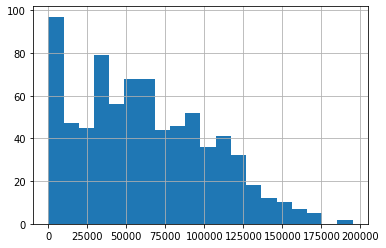

In [36]:
#what is the salary breakdown of the people working in these bootcamps?
bootcamp_df['Salary'].hist(bins = 20)

### It seems like there is enormous inconsistency in the salary remuneration from the bootcamps

### Explore job satisfaction

In [37]:
#what is the proportion of missing values in job satisfaction column
df.JobSatisfaction.isnull().mean()

0.21435242839352428

In [38]:
#mean value for Jobsatisfaction
df.JobSatisfaction.mean()

6.957078462452943

In [39]:
#using groupby to determine the group with highest job satisfaction
df.groupby('EmploymentStatus').mean()['JobSatisfaction']

EmploymentStatus
Employed full-time                                      6.926805
Employed part-time                                      6.821468
I prefer not to say                                          NaN
Independent contractor, freelancer, or self-employed    7.252823
Not employed, and not looking for work                  7.000000
Not employed, but looking for work                           NaN
Retired                                                      NaN
Name: JobSatisfaction, dtype: float64

In [40]:
#company size vs jobsatisfaction
df.groupby('CompanySize').mean()['JobSatisfaction'].sort_values()

CompanySize
5,000 to 9,999 employees    6.748153
10,000 or more employees    6.810345
I don't know                6.842679
500 to 999 employees        6.883661
1,000 to 4,999 employees    6.884509
100 to 499 employees        6.937089
20 to 99 employees          6.949092
10 to 19 employees          7.000799
Fewer than 10 employees     7.008749
I prefer not to answer      7.280835
Name: JobSatisfaction, dtype: float64

In [41]:
#using a dictionary to check data exploration solutions
a = 6.957
b = 0.214
c = 'full-time'
d = 'contractors'
e = 'retired'
f = 'yes'
g = 'no'
h = 'hard to tell'

job_sol_1 = {'The proportion of missing values in the Job Satisfaction column': b,
             'According to EmploymentStatus, which group has the highest average job satisfaction?': d, 
             'In general, do smaller companies appear to have employees with higher job satisfaction?': f}
             
t.jobsat_check1(job_sol_1)

Nice job! That's what we found as well!


In [42]:
#does programming outside of word lead to higher job satisfaction?
df.groupby('ProgramHobby').mean()['JobSatisfaction'].sort_values()

ProgramHobby
No                                           6.833825
Yes, I program as a hobby                    6.913072
Yes, I contribute to open source projects    7.041535
Yes, both                                    7.108041
Name: JobSatisfaction, dtype: float64

I realize that I am asking the wrong question, I think that people that have higher satisfaction in the work place will be more likely to engage in programming actives outside of it

In [43]:
#does flexibility influence job satisfaction?
df.groupby('HomeRemote').mean()['JobSatisfaction'].sort_values()

HomeRemote
Never                                                      6.632502
It's complicated                                           6.840830
More than half, but not all, the time                      6.953184
About half the time                                        6.973702
A few days each month                                      7.077509
Less than half the time, but at least one day each week    7.120125
All or almost all the time (I'm full-time remote)          7.388430
Name: JobSatisfaction, dtype: float64

In [44]:
df.groupby('FormalEducation').mean()['JobSatisfaction'].sort_values()

FormalEducation
I never completed any formal education                               6.833333
Bachelor's degree                                                    6.866363
Master's degree                                                      6.953151
Primary/elementary school                                            6.956897
I prefer not to answer                                               7.005682
Some college/university study without earning a bachelor's degree    7.081334
Professional degree                                                  7.087459
Secondary school                                                     7.143082
Doctoral degree                                                      7.348857
Name: JobSatisfaction, dtype: float64

In [45]:
a = 'yes'
b = 'no'
c = 'hard to tell'

job_sol_2 = {'Do individuals who program outside of work appear to have higher JobSatisfaction?': a,
             'Does flexibility to work outside of the office appear to have an influence on JobSatisfaction?': a, 
             'A friend says a Doctoral degree increases the chance of having job you like, does this seem true?': a}
             
t.jobsat_check2(job_sol_2)

Nice job! That's what we found as well!


## Modelling
### Predicting Salaries

In [46]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary,HigherEd
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000,51392.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468,0.230697
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829,0.421283
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484,0.000000
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691,0.000000
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806,0.000000
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000,1.000000


In [47]:
#use desbribe to answer multiple questions
a = 40
b = 'HoursPerWeek'
c = 'Salary'
d = 'Respondent'
e = 10
f = 'ExpectedSalary'

desc_sol = {'A column just listing an index for each row': d,
       'The maximum Satisfaction on the scales for the survey': e,
       'The column with the most missing values': f,
       'The variable with the highest spread of values': c}

# Check your solution
t.describe_check(desc_sol)

Nice job that looks right!


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016003A6A2C8>,
      dtype=object)

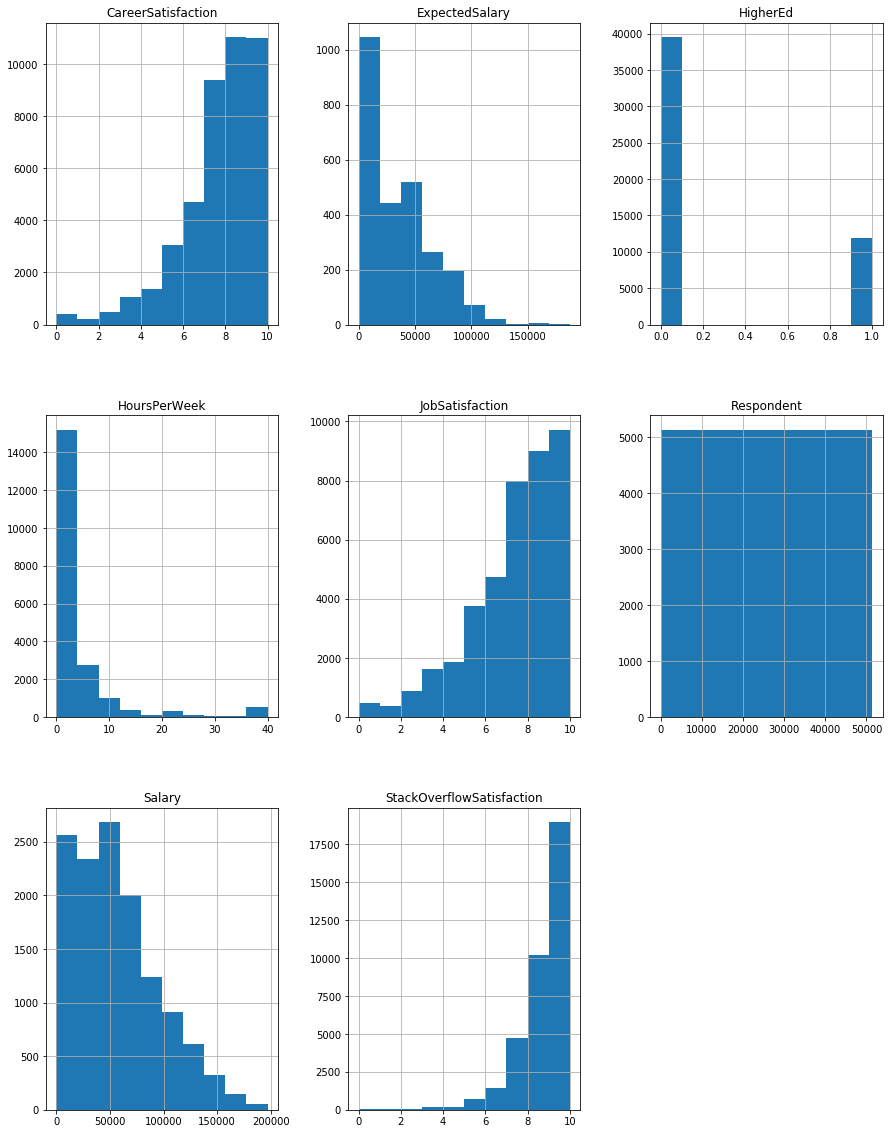

In [48]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

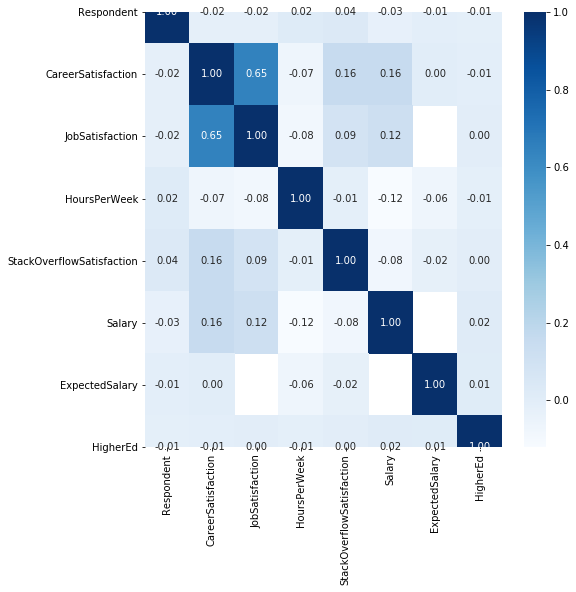

In [49]:
#I will use a correlation matrix to see how the attributes relate to each opther
fig = plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot = True, fmt=".2f", cmap = 'Blues')

In [50]:
#using the correlation heatmap to answer questions
a = 0.65
b = -0.01
c = 'ExpectedSalary'
d = 'No'
e = 'Yes'
f = 'CareerSatisfaction'
g = -0.15

scatter_sol = {'The column with the strongest correlation with Salary': f,
       'The data suggests more hours worked relates to higher salary': d,
       'Data in the ______ column meant missing data in three other columns': c,
       'The strongest negative relationship had what correlation?': g}

t.scatter_check(scatter_sol)

Nice job that looks right!


In [51]:
#Subset to only quantitative vars
num_vars = df[['Salary', 'CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]


num_vars.head()

,Salary,CareerSatisfaction,HoursPerWeek,JobSatisfaction,StackOverflowSatisfaction
0,NaN,NaN,0.0,NaN,9.0
1,NaN,NaN,NaN,NaN,8.0
2,113750.0,8.0,NaN,9.0,8.0
3,NaN,6.0,5.0,3.0,10.0
4,NaN,6.0,NaN,8.0,NaN


In [52]:
#number of individuals that reported a salary
prop_sals = 1 - df.isnull()['Salary'].mean()# Proportion of individuals in the dataset with salary reported

prop_sals

0.25083670610211706

In [53]:
#removing rows with missing salary values
sal_rm = num_vars.dropna(subset=['Salary'], axis=0)# dataframe with rows for nan Salaries removed

sal_rm.head()

,Salary,CareerSatisfaction,HoursPerWeek,JobSatisfaction,StackOverflowSatisfaction
2,113750.0,8.0,NaN,9.0,8.0
14,100000.0,8.0,NaN,8.0,8.0
17,130000.0,9.0,NaN,8.0,8.0
18,82500.0,5.0,NaN,3.0,NaN
22,100764.0,8.0,NaN,9.0,8.0


In [54]:
#removing rows with nans in any column of num_vars
all_rm = num_vars.dropna(axis=0) # dataframe with rows for nan Salaries removed

all_rm.head()

,Salary,CareerSatisfaction,HoursPerWeek,JobSatisfaction,StackOverflowSatisfaction
25,175000.000000,7.0,0.0,7.0,9.0
34,14838.709677,10.0,1.0,8.0,10.0
52,15674.203822,6.0,4.0,5.0,8.0
57,43010.752688,10.0,2.0,6.0,10.0
70,65000.000000,8.0,2.0,5.0,7.0


In [55]:
X_2 = all_rm[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y_2 = all_rm['Salary']

# Split data into training and test data, and fit a linear model
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2 , test_size=.30, random_state=42)
lm_2_model = LinearRegression(normalize=True)

# If our model works, it should just fit our model to the data. Otherwise, it will let us know.
try:
    lm_2_model.fit(X_2_train, y_2_train)
except:
    print("Oh no! It doesn't work!!!")

In [56]:
y_test_preds = lm_2_model.predict(X_2_test)# Predictions here
r2_test = r2_score(y_2_test, y_test_preds) # Rsquared here

# Print r2 to see result
r2_test

0.030994664959115625

### second approach with fine combed imputation

In [57]:
#Only use quant variables and drop any rows with missing values

num_vars = df[['Salary', 'CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
df_dropna = num_vars.dropna(axis=0)

#Split into explanatory and response variables
X = df_dropna[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y = df_dropna['Salary']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for your model was 0.030994664959115625 on 1602 values.'

In [58]:
#Using the num_vars dataframe from drop the missing values of the response (Salary) - store this in drop_sal_df, 
#then impute the values for all the other missing values with the mean of the column - store this in fill_df
drop_sal_df = num_vars.dropna(subset=['Salary'], axis=0) #Drop the rows with missing salaries

fill_mean = lambda col: col.fillna(col.mean()) # Mean function

fill_df = drop_sal_df.apply(fill_mean, axis=0) #Fill all missing values with the mean of the column.

In [59]:
#Split into explanatory and response variables
X = fill_df[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y = fill_df['Salary']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for your model was 0.04072431792894737 on 3868 values.'

### Third approach with encoding of cats

In [60]:
#Only use quant variables and drop any rows with missing values
num_vars = df[['Salary', 'CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]

#Drop the rows with missing salaries
drop_sal_df = num_vars.dropna(subset=['Salary'], axis=0)

# Mean function
fill_mean = lambda col: col.fillna(col.mean())
# Fill the mean
fill_df = drop_sal_df.apply(fill_mean, axis=0)

#Split into explanatory and response variables
X = fill_df[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y = fill_df['Salary']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.04072431792894737 on 3868 values.'

In [61]:
#check for cat columns
cat_df = df.select_dtypes(include=['object']) # Subset to a dataframe only holding the categorical columns

In [62]:
#Use cat_df and the cells below to fill in the dictionary below the correct value for each statement.
np.sum(np.sum(cat_df.isnull())/cat_df.shape[0] == 0)# Cell for your work here

6

In [63]:
np.sum(np.sum(cat_df.isnull())/cat_df.shape[0] > .5)

50

In [64]:
np.sum(np.sum(cat_df.isnull())/cat_df.shape[0] > .75)

13

In [65]:
# Provide the key as an `integer` that answers the question

cat_df_dict = {'the number of columns with no missing values': 6, 
               'the number of columns with more than half of the column missing': 50,
               'the number of columns with more than 75% of the column missing': 13
}

In [66]:
#create dummies
dummy_var_df = pd.DataFrame({'col1': ['a', 'a', 'b', 'b', 'a', np.nan, 'b', np.nan],
                             'col2': [1, np.nan, 3, np.nan, 5, 6, 7, 8] 
})
                            
dummy_var_df

,col1,col2
0,a,1.0
1,a,NaN
2,b,3.0
3,b,NaN
4,a,5.0
5,NaN,6.0
6,b,7.0
7,NaN,8.0


In [67]:
pd.get_dummies(dummy_var_df['col1'])

,a,b
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0
5,0,0
6,0,1
7,0,0


In [68]:
#Pull a list of the column names of the categorical variables
cat_cols_lst = cat_df.columns

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [69]:
#Dropping where the salary has missing values
df  = df.dropna(subset=['Salary'], axis=0)

#Pull a list of the column names of the categorical variables
cat_df = df.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns

df_new = create_dummy_df(df, cat_cols_lst, dummy_na=False) #Use your newly created function

# Show a header of df_new to check
print(df_new.shape)

(12891, 21111)


In [70]:
def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    Your function should:
    1. Drop the rows with missing response values
    2. Drop columns with NaN for all the values
    3. Use create_dummy_df to dummy categorical columns
    4. Fill the mean of the column for any missing values 
    5. Split your data into an X matrix and a response vector y
    6. Create training and test sets of data
    7. Instantiate a LinearRegression model with normalized data
    8. Fit your model to the training data
    9. Predict the response for the training data and the test data
    10. Obtain an rsquared value for both the training and test data
    '''
    #Drop the rows with missing response values
    df  = df.dropna(subset=[response_col], axis=0)

    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    #Dummy categorical variables
    df = create_dummy_df(df, cat_cols, dummy_na)

    # Mean function
    fill_mean = lambda col: col.fillna(col.mean())
    # Fill the mean
    df = df.apply(fill_mean, axis=0)

    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


In [71]:
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_new, 'Salary', cat_cols_lst, dummy_na=False)

In [72]:
#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 1.0.  The rsquared on the test data was -0.5245827416783675.


Well, that rsquared smells like overfitting

### Fourth approach 

In [73]:
#create the X (explanatory matrix) and y (response vector) to be used in the model
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['Salary'], axis=0)
    y = df['Salary']
    
    #Drop respondent and expected salary columns
    df = df.drop(['Respondent', 'ExpectedSalary', 'Salary'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y

In [74]:
#Use the function to create X and y
X, y = clean_data(df)    

In [78]:
def clean_fit_linear_mod(df, response_col, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test

    OUTPUT:
    X - cleaned X matrix (dummy and mean imputation)
    y - cleaned response (just dropped na)
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model

    This function cleans the data and provides the necessary output for the rest of this notebook.
    '''
    #Dropping where the salary has missing values
    df  = df.dropna(subset=['Salary'], axis=0)

    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    #Pull a list of the column names of the categorical variables
    cat_df = df.select_dtypes(include=['object'])
    cat_cols = cat_df.columns

    #dummy all the cat_cols
    for col in  cat_cols:
        df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=True)], axis=1)


    # Mean function
    fill_mean = lambda col: col.fillna(col.mean())
    # Fill the mean
    df = df.apply(fill_mean, axis=0)

    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return X, y, test_score, train_score, lm_model, X_train, X_test, y_train, y_test

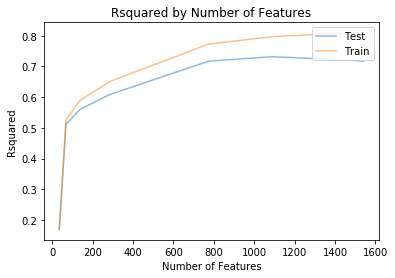

In [79]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [80]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

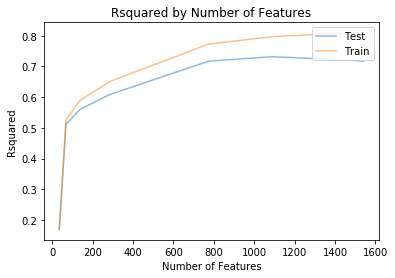

In [81]:
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [82]:
print(X_train.shape[1]) #Number of columns
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)]) # The model we should implement train_r2

1089
0.7316720515685996
0.7968545319831759


In [83]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
4,HigherEd,4.224896e+15,4.224896e+15
52,FormalEducation_Professional degree,-4.224896e+15,4.224896e+15
50,FormalEducation_Master's degree,-4.224896e+15,4.224896e+15
43,Country_United States,5.673087e+04,5.673087e+04
29,Country_Norway,4.054668e+04,4.054668e+04
9,Country_Australia,4.010954e+04,4.010954e+04
384,Currency_Swiss francs,3.675333e+04,3.675333e+04
16,Country_Denmark,3.049288e+04,3.049288e+04
124,YearsCodedJob_20 or more years,2.998107e+04,2.998107e+04
28,Country_New Zealand,2.994889e+04,2.994889e+04
